### Import directories 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
le = LabelEncoder()

# Load dataset

In [5]:
df = pd.read_csv("bus_terminal_dataset_55000_50plus.csv")

In [6]:
df.head()

,Passenger_ID,Passenger_Name,Age,Gender,Age_Group,Bus_Number,Source,Destination,Distance_km,Departure_Time,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,1,Passenger_1,56,Male,Senior,82,City_A,City_Y,187,06:00:00,...,91,91,46,0,2,79,70,93,46,21
1,2,Passenger_2,69,Female,Elder,116,City_D,City_X,417,06:01:00,...,74,14,54,85,39,0,98,10,16,75
2,3,Passenger_3,46,Male,Adult,186,City_B,City_Z,126,06:02:00,...,89,61,41,36,21,34,46,48,89,40
3,4,Passenger_4,32,Male,Youth,76,City_B,City_X,56,06:03:00,...,21,92,93,53,34,68,71,59,85,64
4,5,Passenger_5,60,Female,Senior,64,City_D,City_X,362,06:04:00,...,85,39,2,80,40,7,24,25,11,98


In [7]:
print(df[['Is_Peak_Time']])

       Is_Peak_Time
0                 0
1                 1
2                 0
3                 0
4                 1
...             ...
54995             1
54996             1
54997             0
54998             1
54999             1

[55000 rows x 1 columns]


In [8]:
df.count()

Passenger_ID              55000
Passenger_Name            55000
Age                       55000
Gender                    55000
Age_Group                 55000
Bus_Number                55000
Source                    55000
Destination               55000
Distance_km               55000
Departure_Time            55000
Arrival_Time              55000
Is_Peak_Time              55000
Weather_Condition         55000
Ticket_Price              55000
Predicted_Ticket_Price    55000
Payment_Method            55000
Loyalty_Program           55000
Customer_Rating           55000
Travel_Duration_hr        55000
Ticket_Category           55000
Feature_1                 55000
Feature_2                 55000
Feature_3                 55000
Feature_4                 55000
Feature_5                 55000
Feature_6                 55000
Feature_7                 55000
Feature_8                 55000
Feature_9                 55000
Feature_10                55000
Feature_11                55000
Feature_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Passenger_ID            55000 non-null  int64  
 1   Passenger_Name          55000 non-null  object 
 2   Age                     55000 non-null  int64  
 3   Gender                  55000 non-null  object 
 4   Age_Group               55000 non-null  object 
 5   Bus_Number              55000 non-null  int64  
 6   Source                  55000 non-null  object 
 7   Destination             55000 non-null  object 
 8   Distance_km             55000 non-null  int64  
 9   Departure_Time          55000 non-null  object 
 10  Arrival_Time            55000 non-null  object 
 11  Is_Peak_Time            55000 non-null  int64  
 12  Weather_Condition       55000 non-null  object 
 13  Ticket_Price            55000 non-null  float64
 14  Predicted_Ticket_Price  55000 non-null

In [10]:
df.isnull().sum()


Passenger_ID              0
Passenger_Name            0
Age                       0
Gender                    0
Age_Group                 0
Bus_Number                0
Source                    0
Destination               0
Distance_km               0
Departure_Time            0
Arrival_Time              0
Is_Peak_Time              0
Weather_Condition         0
Ticket_Price              0
Predicted_Ticket_Price    0
Payment_Method            0
Loyalty_Program           0
Customer_Rating           0
Travel_Duration_hr        0
Ticket_Category           0
Feature_1                 0
Feature_2                 0
Feature_3                 0
Feature_4                 0
Feature_5                 0
Feature_6                 0
Feature_7                 0
Feature_8                 0
Feature_9                 0
Feature_10                0
Feature_11                0
Feature_12                0
Feature_13                0
Feature_14                0
Feature_15                0
Feature_16          

In [11]:
df.columns

Index(['Passenger_ID', 'Passenger_Name', 'Age', 'Gender', 'Age_Group',
       'Bus_Number', 'Source', 'Destination', 'Distance_km', 'Departure_Time',
       'Arrival_Time', 'Is_Peak_Time', 'Weather_Condition', 'Ticket_Price',
       'Predicted_Ticket_Price', 'Payment_Method', 'Loyalty_Program',
       'Customer_Rating', 'Travel_Duration_hr', 'Ticket_Category', 'Feature_1',
       'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6',
       'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11',
       'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16',
       'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21',
       'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26',
       'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30'],
      dtype='object')

In [12]:
df.describe()

,Passenger_ID,Age,Bus_Number,Distance_km,Is_Peak_Time,Ticket_Price,Predicted_Ticket_Price,Customer_Rating,Travel_Duration_hr,Feature_1,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,55000.00000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,...,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,27500.50000,48.515855,100.158745,275.186527,0.302273,274.675604,274.649579,2.998982,4.762973,49.423473,...,49.680727,49.425618,49.260018,49.524109,49.529800,49.474418,49.525055,49.608127,49.428182,49.381655
std,15877.27674,17.866932,57.621960,129.600463,0.459247,130.161743,130.326029,1.157029,2.479543,28.881940,...,29.007564,28.865970,28.792959,28.806986,28.759226,28.891577,28.922900,29.009627,28.829048,28.865696
min,1.00000,18.000000,1.000000,50.000000,0.000000,50.000000,40.440000,1.000000,0.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13750.75000,33.000000,50.000000,164.000000,0.000000,161.277500,161.480000,2.000000,2.700000,24.000000,...,25.000000,24.000000,24.000000,24.000000,25.000000,24.000000,24.000000,24.000000,24.000000,24.000000
50%,27500.50000,48.000000,100.000000,275.000000,0.000000,274.625000,274.655000,3.000000,4.600000,49.000000,...,50.000000,49.000000,49.000000,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000,49.000000
75%,41250.25000,64.000000,150.000000,388.000000,1.000000,387.510000,387.410000,4.000000,6.500000,74.000000,...,75.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,75.000000,74.000000,74.000000
max,55000.00000,79.000000,200.000000,499.000000,1.000000,500.000000,509.520000,5.000000,12.400000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [13]:
df.shape


(55000, 50)

## Drop irralivant columns 

In [15]:
df = df.drop(['Passenger_ID', 'Passenger_Name', 'Age', 'Gender'], axis=1)

In [16]:
df.columns

Index(['Age_Group', 'Bus_Number', 'Source', 'Destination', 'Distance_km',
       'Departure_Time', 'Arrival_Time', 'Is_Peak_Time', 'Weather_Condition',
       'Ticket_Price', 'Predicted_Ticket_Price', 'Payment_Method',
       'Loyalty_Program', 'Customer_Rating', 'Travel_Duration_hr',
       'Ticket_Category', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30'],
      dtype='object')

In [17]:
df.shape

(55000, 46)

#  Missing values

In [19]:
df.isnull().sum()

Age_Group                 0
Bus_Number                0
Source                    0
Destination               0
Distance_km               0
Departure_Time            0
Arrival_Time              0
Is_Peak_Time              0
Weather_Condition         0
Ticket_Price              0
Predicted_Ticket_Price    0
Payment_Method            0
Loyalty_Program           0
Customer_Rating           0
Travel_Duration_hr        0
Ticket_Category           0
Feature_1                 0
Feature_2                 0
Feature_3                 0
Feature_4                 0
Feature_5                 0
Feature_6                 0
Feature_7                 0
Feature_8                 0
Feature_9                 0
Feature_10                0
Feature_11                0
Feature_12                0
Feature_13                0
Feature_14                0
Feature_15                0
Feature_16                0
Feature_17                0
Feature_18                0
Feature_19                0
Feature_20          

##  Convert all categorical Columns

In [22]:
for c in df.columns:
    if df[c].dtype == 'object' :  
        df[c] = le.fit_transform(df[c])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age_Group               55000 non-null  int32  
 1   Bus_Number              55000 non-null  int64  
 2   Source                  55000 non-null  int32  
 3   Destination             55000 non-null  int32  
 4   Distance_km             55000 non-null  int64  
 5   Departure_Time          55000 non-null  int32  
 6   Arrival_Time            55000 non-null  int32  
 7   Is_Peak_Time            55000 non-null  int64  
 8   Weather_Condition       55000 non-null  int32  
 9   Ticket_Price            55000 non-null  float64
 10  Predicted_Ticket_Price  55000 non-null  float64
 11  Payment_Method          55000 non-null  int32  
 12  Loyalty_Program         55000 non-null  int32  
 13  Customer_Rating         55000 non-null  float64
 14  Travel_Duration_hr      55000 non-null

In [26]:
df.shape

(55000, 46)

## Grouping

In [33]:
G1 = df.iloc[0:18333 , 0:15]
G2 = df.iloc[18333:36667 , 15:30]
G3 = df.iloc[36667:55000 , 30:46]

In [37]:
df.shape

(55000, 46)

## Find Correlation of dataset

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
correlation = df.corr()
print(correlation)

                        Age_Group  Bus_Number    Source  Destination  \
Age_Group                1.000000    0.001664 -0.002362    -0.004866   
Bus_Number               0.001664    1.000000  0.008014    -0.004048   
Source                  -0.002362    0.008014  1.000000    -0.005120   
Destination             -0.004866   -0.004048 -0.005120     1.000000   
Distance_km             -0.001645    0.000877 -0.010999     0.005060   
Departure_Time          -0.002652   -0.002222  0.001482     0.000501   
Arrival_Time             0.004217   -0.000571  0.005423     0.010213   
Is_Peak_Time            -0.000978   -0.009588  0.007097    -0.000336   
Weather_Condition       -0.003999    0.002264 -0.000818     0.004856   
Ticket_Price             0.004667   -0.002361 -0.004422     0.004889   
Predicted_Ticket_Price   0.004579   -0.002330 -0.004337     0.005104   
Payment_Method           0.001436   -0.000815  0.001402     0.006573   
Loyalty_Program         -0.001310   -0.011372 -0.000616     0.00

## Heat Map of df Correlation

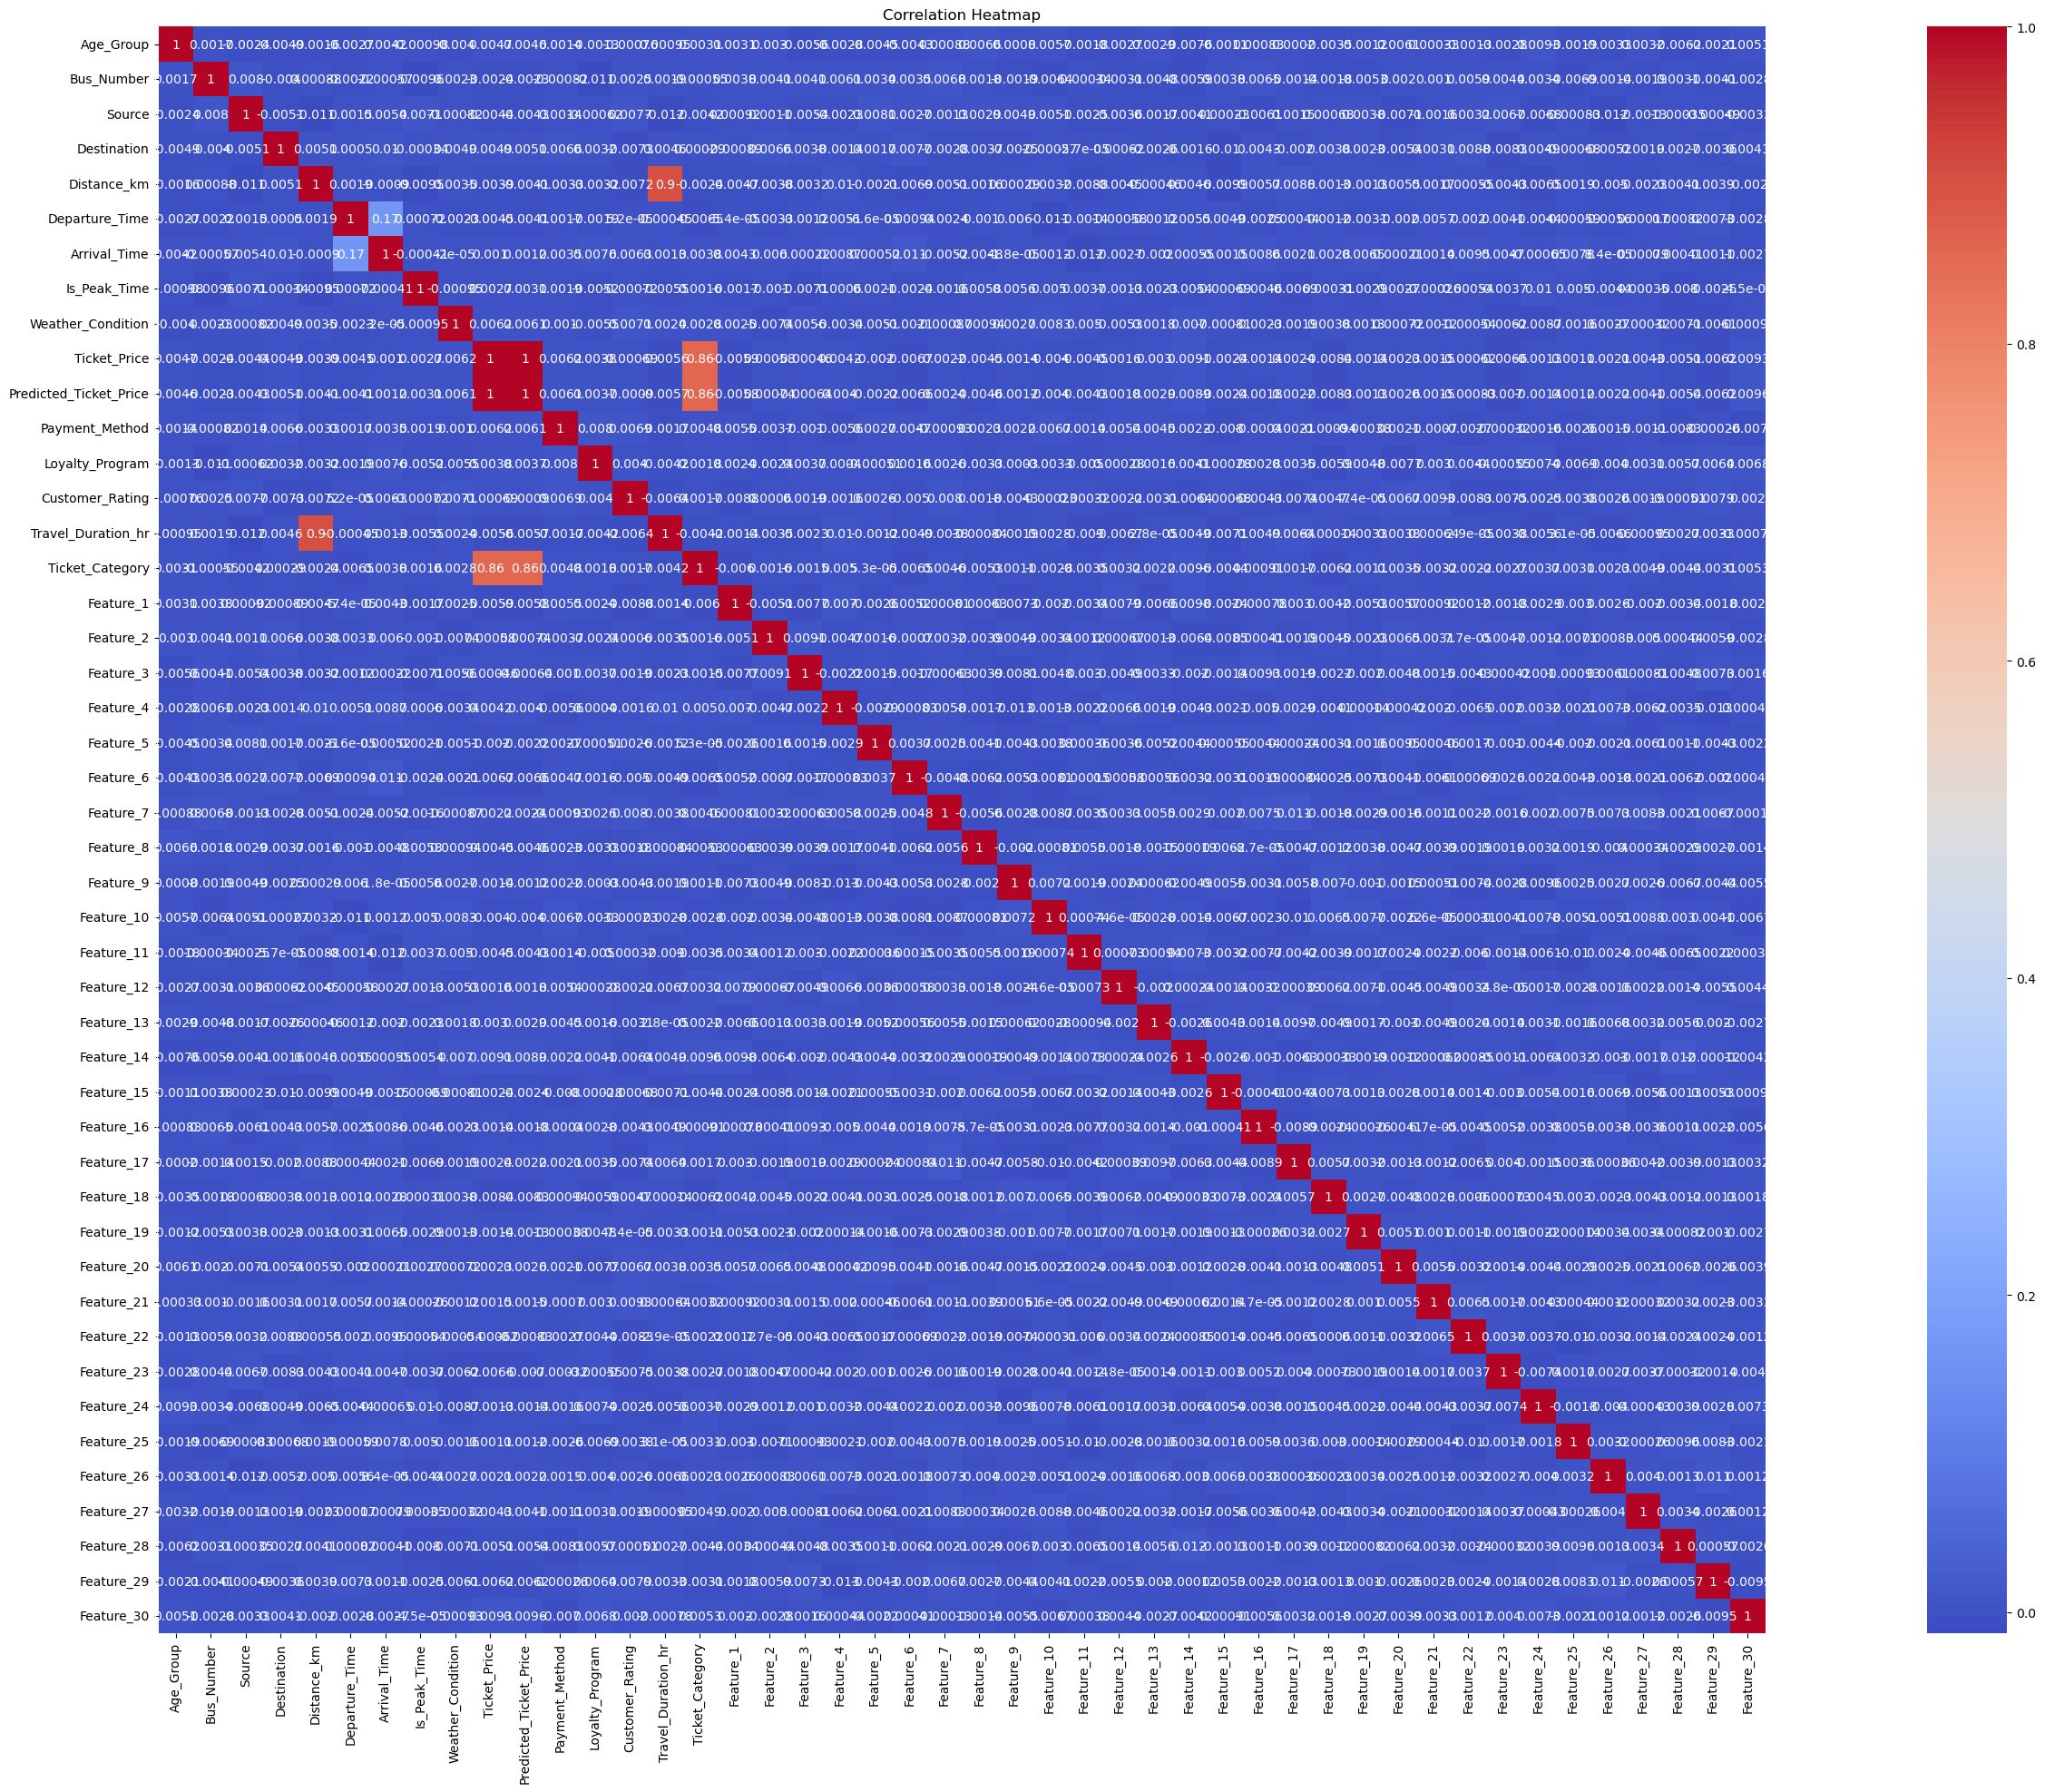

In [ ]:
plt.figure(figsize=(46,23))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - All 46 Features')
plt.tight_layout()
plt.savefig('heatmap_all_features.png', dpi=100, bbox_inches='tight')
plt.show()

In [49]:
correlation = G1.corr()
print(correlation)


                        Age_Group  Bus_Number    Source  Destination  \
Age_Group                1.000000    0.007513  0.002489    -0.010410   
Bus_Number               0.007513    1.000000  0.014712     0.011190   
Source                   0.002489    0.014712  1.000000    -0.006662   
Destination             -0.010410    0.011190 -0.006662     1.000000   
Distance_km             -0.008064    0.005911 -0.019389     0.011302   
Departure_Time          -0.003814   -0.008865 -0.002593    -0.003802   
Arrival_Time             0.015114    0.003185  0.004821     0.016196   
Is_Peak_Time            -0.000929   -0.004752 -0.006045    -0.002517   
Weather_Condition       -0.010614    0.003267 -0.011622     0.012583   
Ticket_Price             0.010021    0.011735 -0.002345     0.001902   
Predicted_Ticket_Price   0.009969    0.011742 -0.002275     0.002081   
Payment_Method           0.004879   -0.001573 -0.002536     0.007143   
Loyalty_Program         -0.006350   -0.015824  0.011584    -0.00

## Heat Map of G1 Correlation

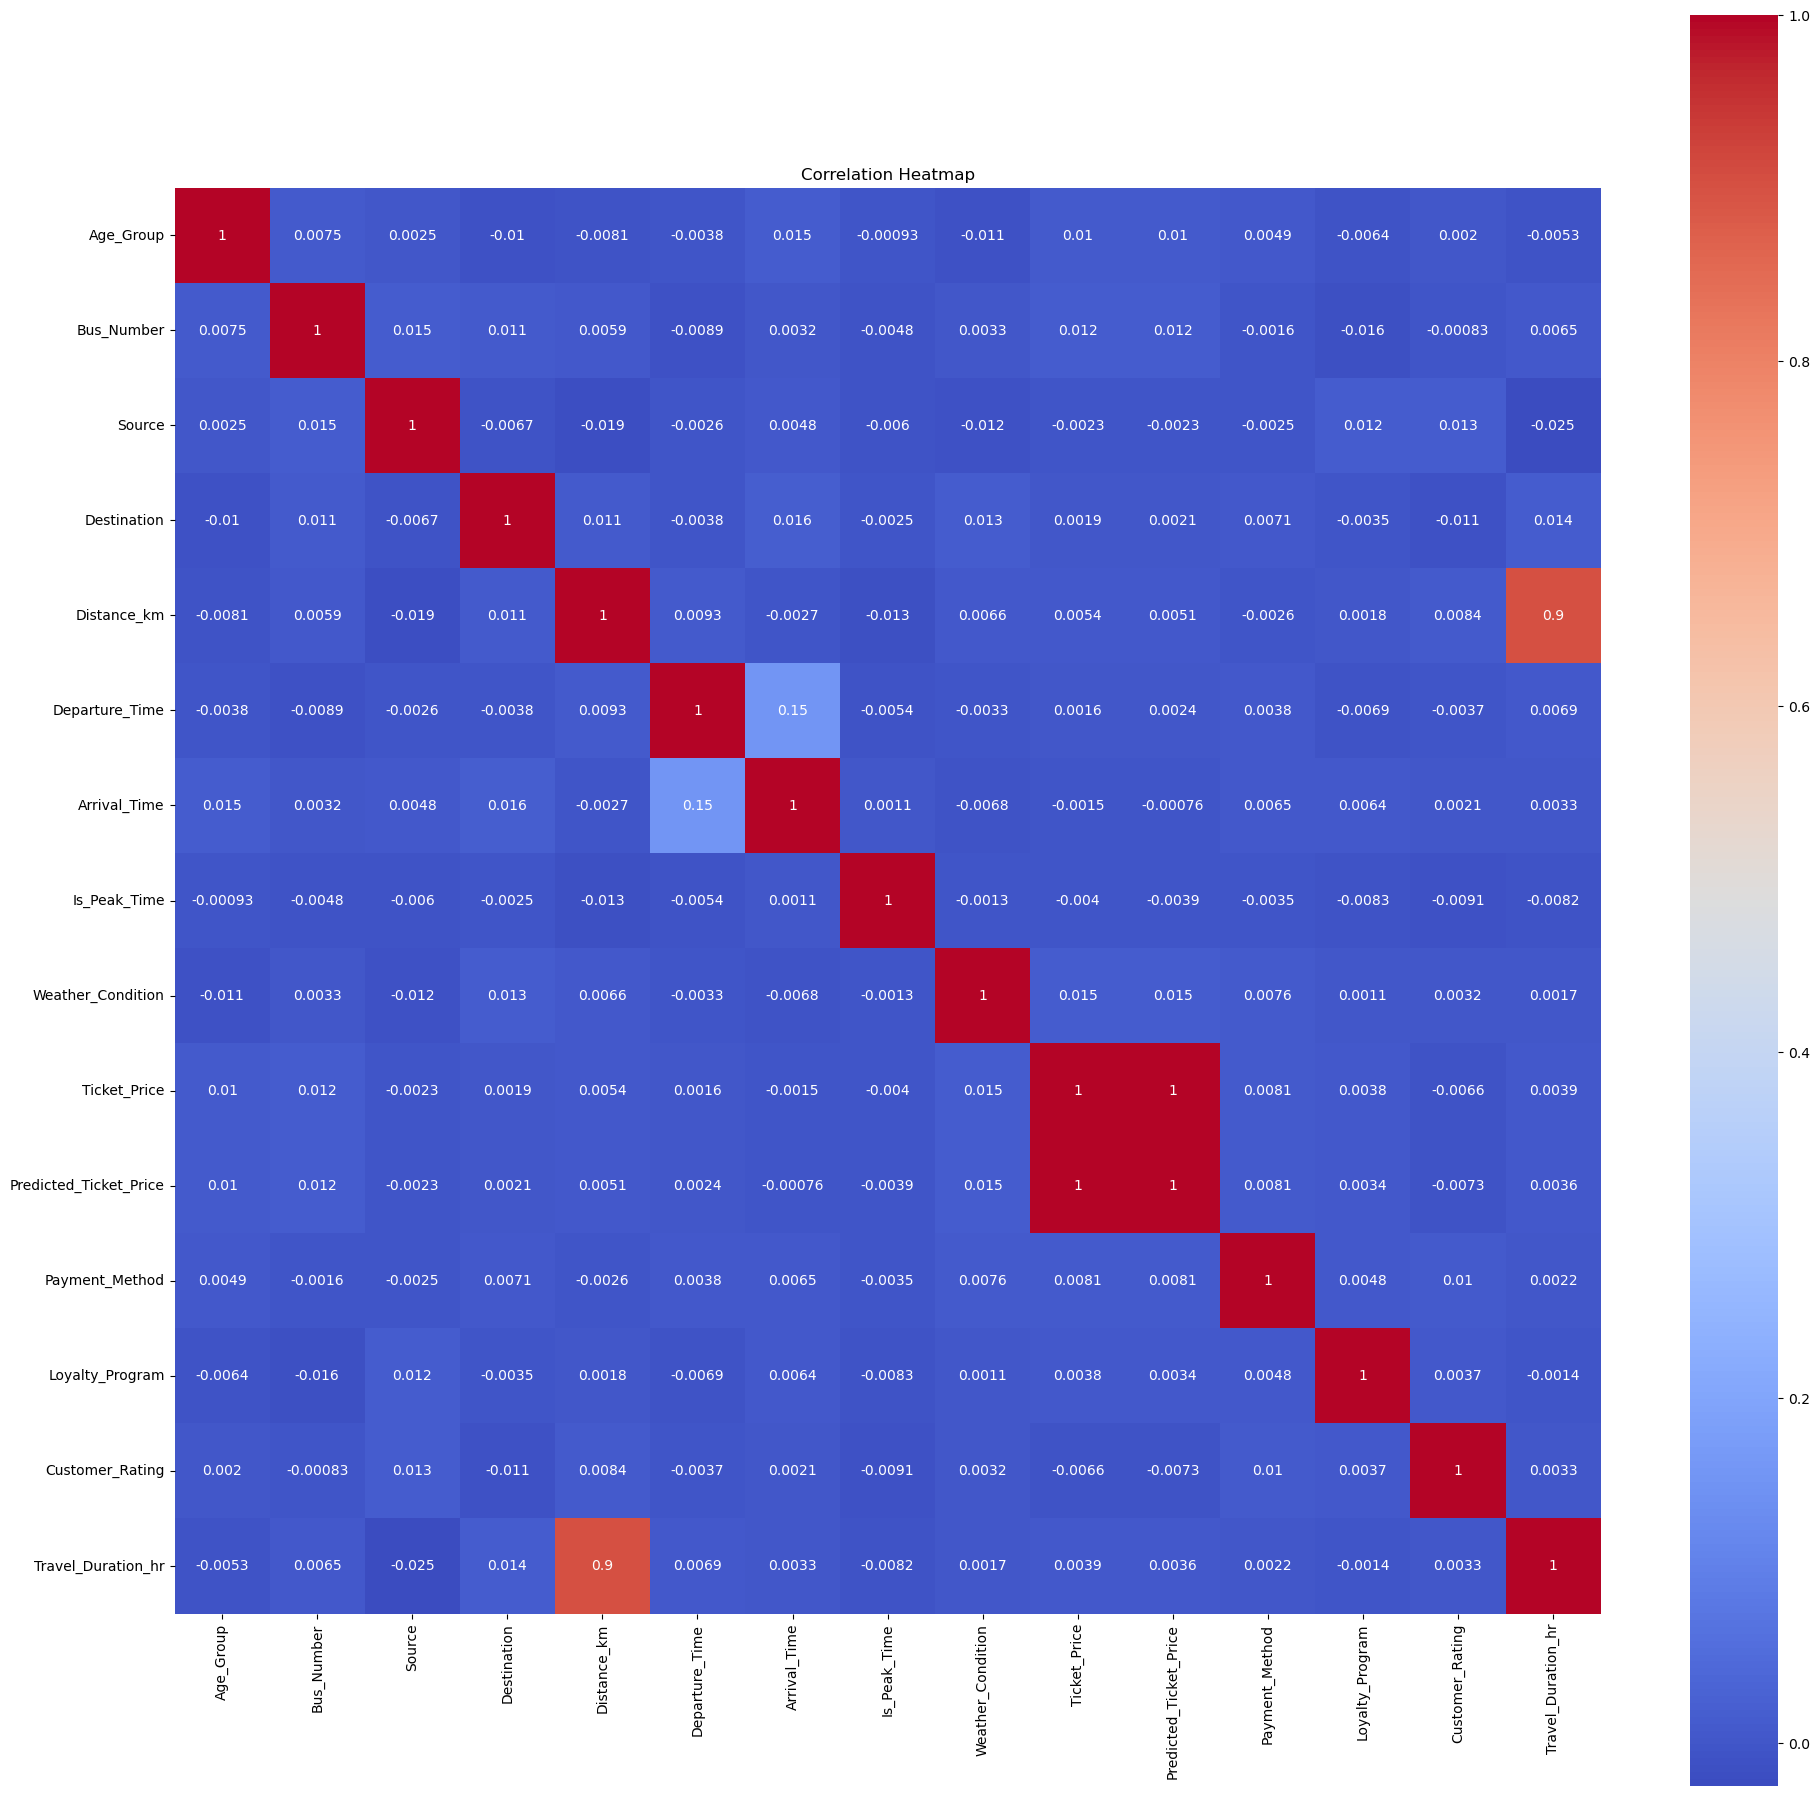

In [ ]:
plt.figure(figsize=(23,23))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Group 1 (Features 0-15)')
plt.tight_layout()
plt.savefig('heatmap_group1_features.png', dpi=100, bbox_inches='tight')
plt.show()

## Heat Map G2 of Correlation

In [55]:
correlation = G2.corr()
print(correlation)


                 Ticket_Category  Feature_1  Feature_2  Feature_3  Feature_4  \
Ticket_Category         1.000000  -0.005012   0.004343  -0.002930   0.002513   
Feature_1              -0.005012   1.000000  -0.005139  -0.007592   0.013131   
Feature_2               0.004343  -0.005139   1.000000   0.009027  -0.015847   
Feature_3              -0.002930  -0.007592   0.009027   1.000000   0.005718   
Feature_4               0.002513   0.013131  -0.015847   0.005718   1.000000   
Feature_5               0.002387   0.002586  -0.002114   0.000434   0.002284   
Feature_6              -0.007377   0.005182  -0.004595   0.001290   0.004646   
Feature_7              -0.000462   0.006875   0.001417  -0.002393   0.013874   
Feature_8               0.000186   0.005163  -0.005221   0.004517  -0.002694   
Feature_9              -0.004578  -0.003434   0.008248   0.001277  -0.015268   
Feature_10              0.002270  -0.001851  -0.000922  -0.002592   0.004502   
Feature_11             -0.006197  -0.017

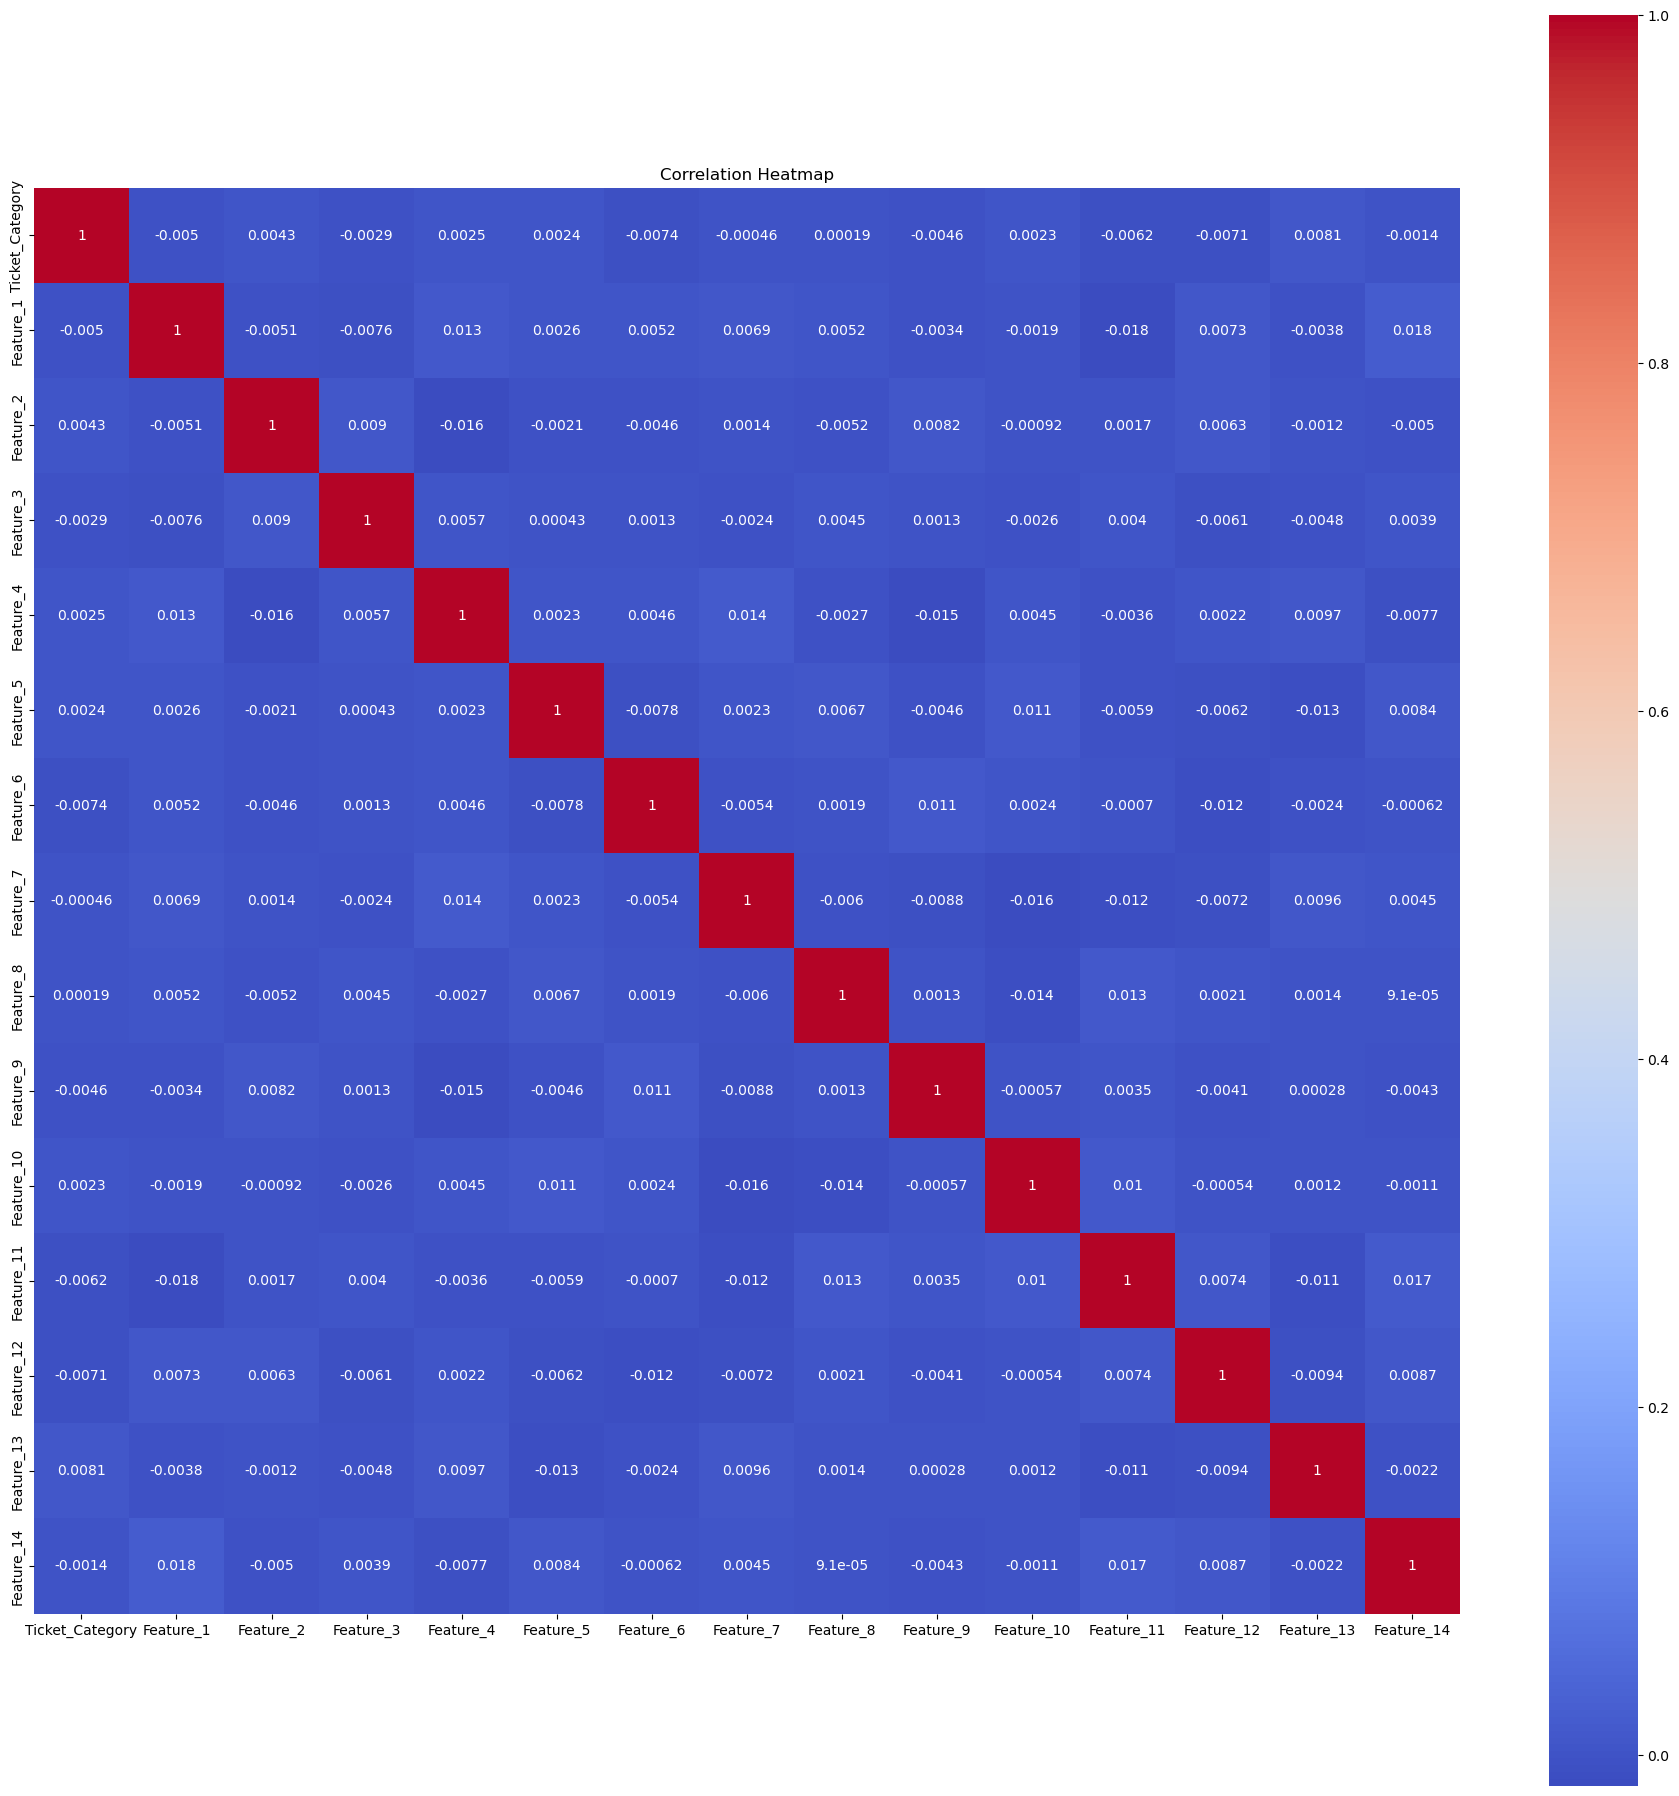

In [ ]:
plt.figure(figsize=(23,23))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Group 2 (Features 15-30)')
plt.tight_layout()
plt.savefig('heatmap_group2_features.png', dpi=100, bbox_inches='tight')
plt.show()

## Heat Map G3 of Correlation

In [59]:
correlation = G3.corr()
print(correlation)

            Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
Feature_15    1.000000   -0.006492   -0.006979    0.014903    0.004519   
Feature_16   -0.006492    1.000000   -0.009087   -0.009802    0.005148   
Feature_17   -0.006979   -0.009087    1.000000    0.012096    0.009518   
Feature_18    0.014903   -0.009802    0.012096    1.000000    0.006215   
Feature_19    0.004519    0.005148    0.009518    0.006215    1.000000   
Feature_20    0.007853    0.000327   -0.006544   -0.003918    0.000014   
Feature_21    0.002153    0.003608    0.000830    0.009828    0.007179   
Feature_22   -0.009514   -0.009456   -0.004040    0.006629    0.004853   
Feature_23   -0.002663   -0.001522    0.004365   -0.009837    0.004479   
Feature_24   -0.000320   -0.007144   -0.003971    0.004976    0.000712   
Feature_25    0.005490    0.002609    0.005559    0.008563   -0.000746   
Feature_26    0.005771   -0.008101   -0.001537   -0.005488   -0.003385   
Feature_27   -0.010064   -0.002302    

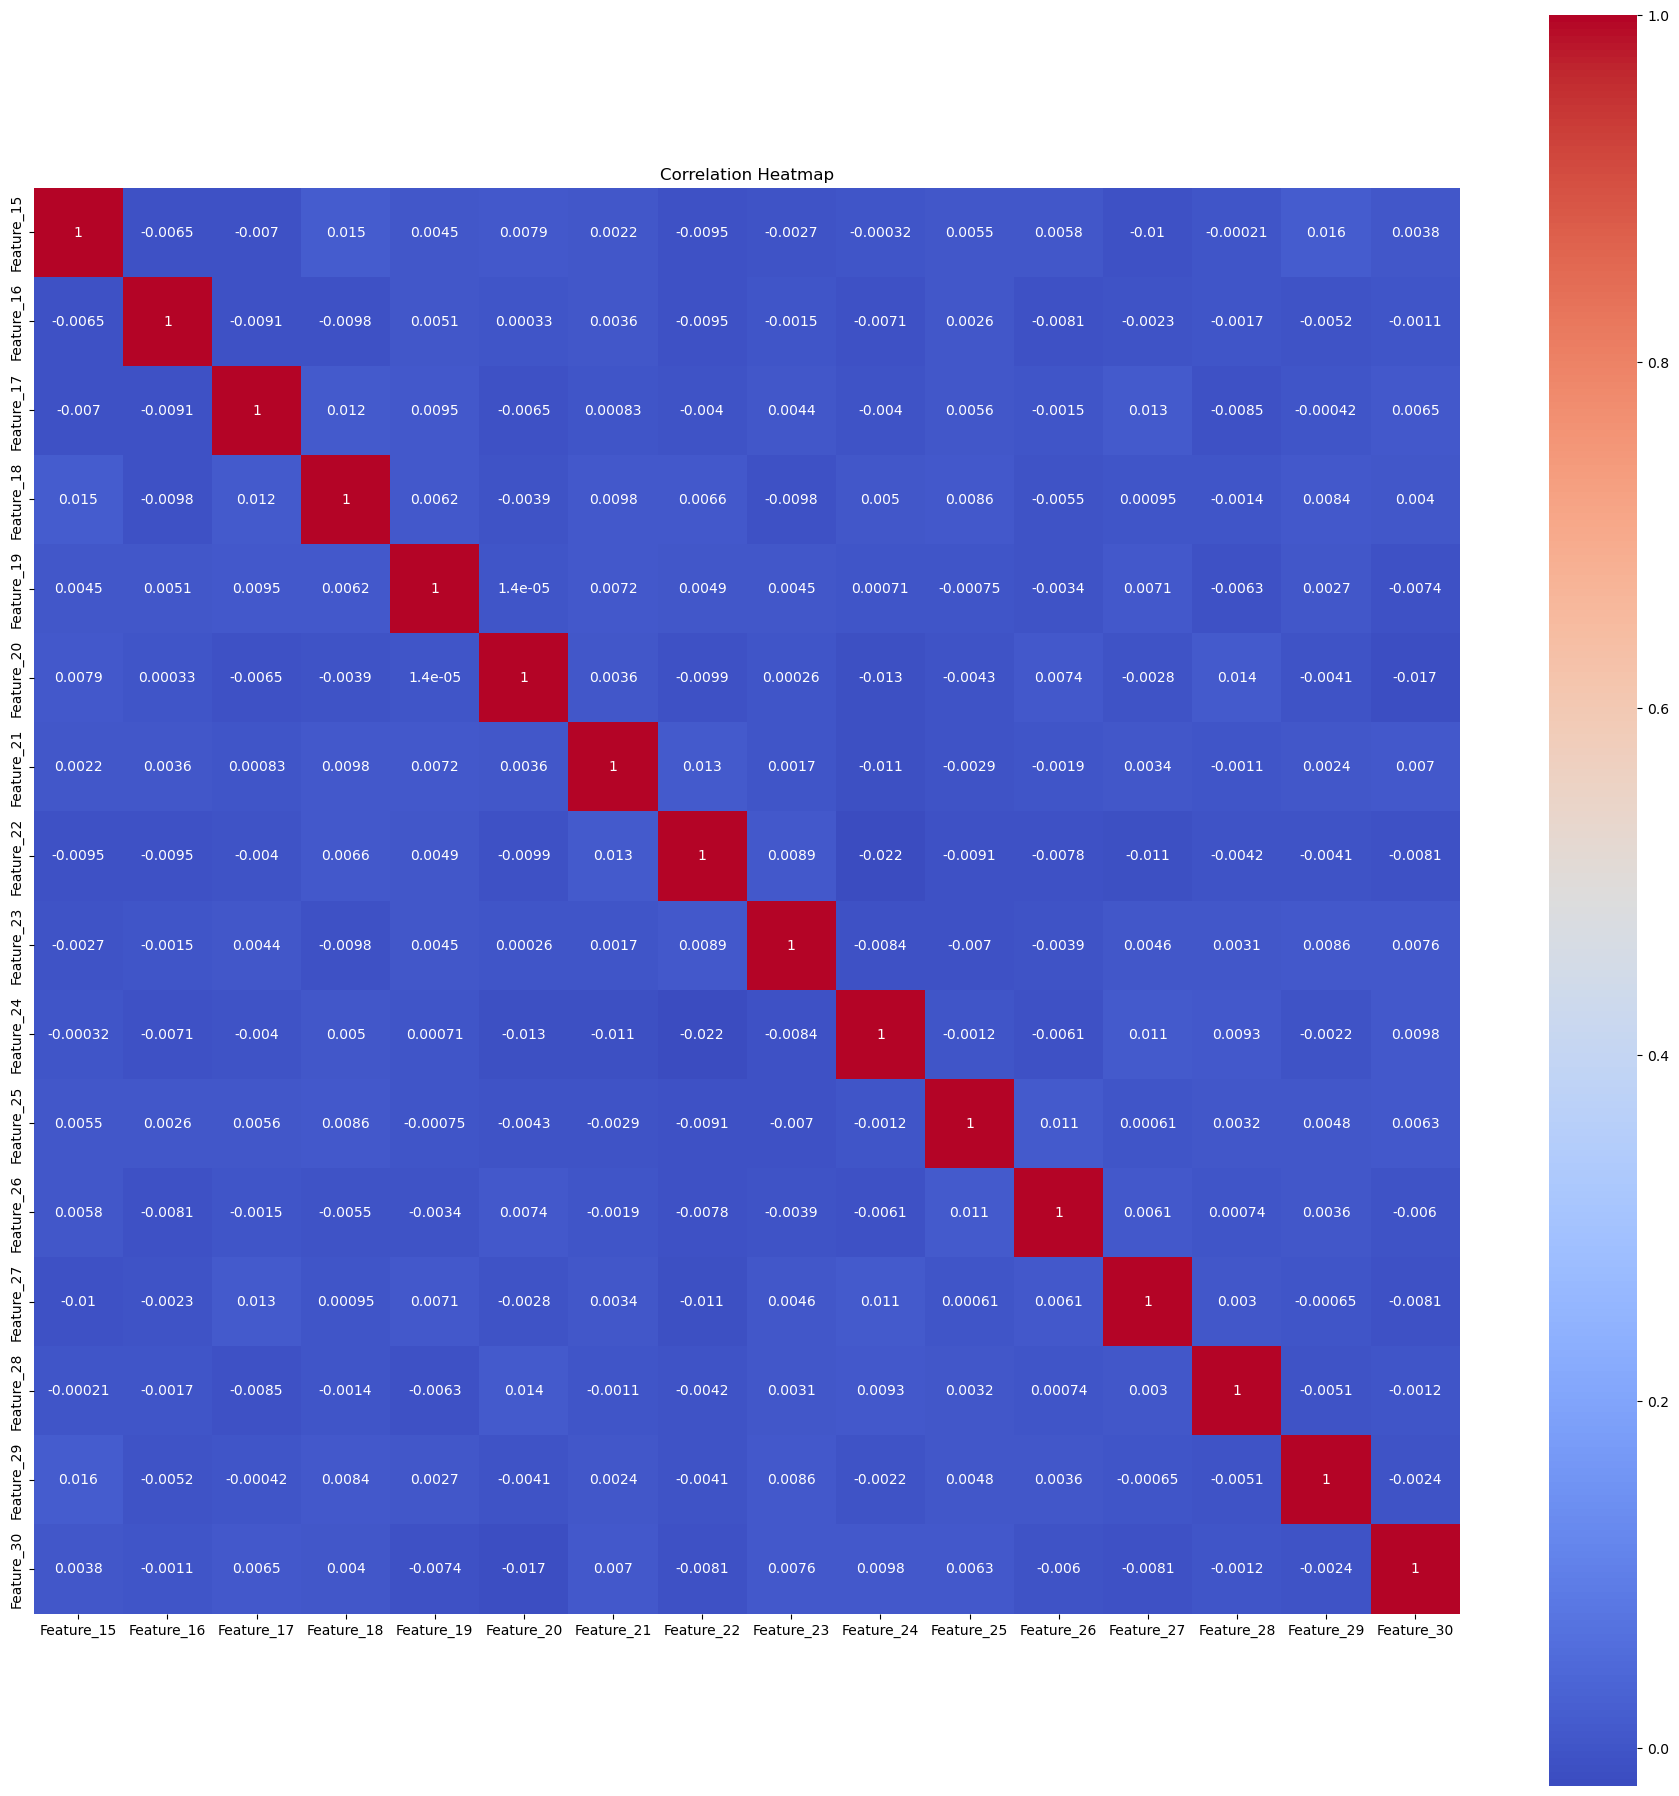

In [ ]:
plt.figure(figsize=(23,23))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Group 3 (Features 30-46)')
plt.tight_layout()
plt.savefig('heatmap_group3_features.png', dpi=100, bbox_inches='tight')
plt.show()

# Correlation after Drop bad relation columns 

In [62]:
correlation = df.corr()
print(correlation)


                        Age_Group  Bus_Number    Source  Destination  \
Age_Group                1.000000    0.001664 -0.002362    -0.004866   
Bus_Number               0.001664    1.000000  0.008014    -0.004048   
Source                  -0.002362    0.008014  1.000000    -0.005120   
Destination             -0.004866   -0.004048 -0.005120     1.000000   
Distance_km             -0.001645    0.000877 -0.010999     0.005060   
Departure_Time          -0.002652   -0.002222  0.001482     0.000501   
Arrival_Time             0.004217   -0.000571  0.005423     0.010213   
Is_Peak_Time            -0.000978   -0.009588  0.007097    -0.000336   
Weather_Condition       -0.003999    0.002264 -0.000818     0.004856   
Ticket_Price             0.004667   -0.002361 -0.004422     0.004889   
Predicted_Ticket_Price   0.004579   -0.002330 -0.004337     0.005104   
Payment_Method           0.001436   -0.000815  0.001402     0.006573   
Loyalty_Program         -0.001310   -0.011372 -0.000616     0.00

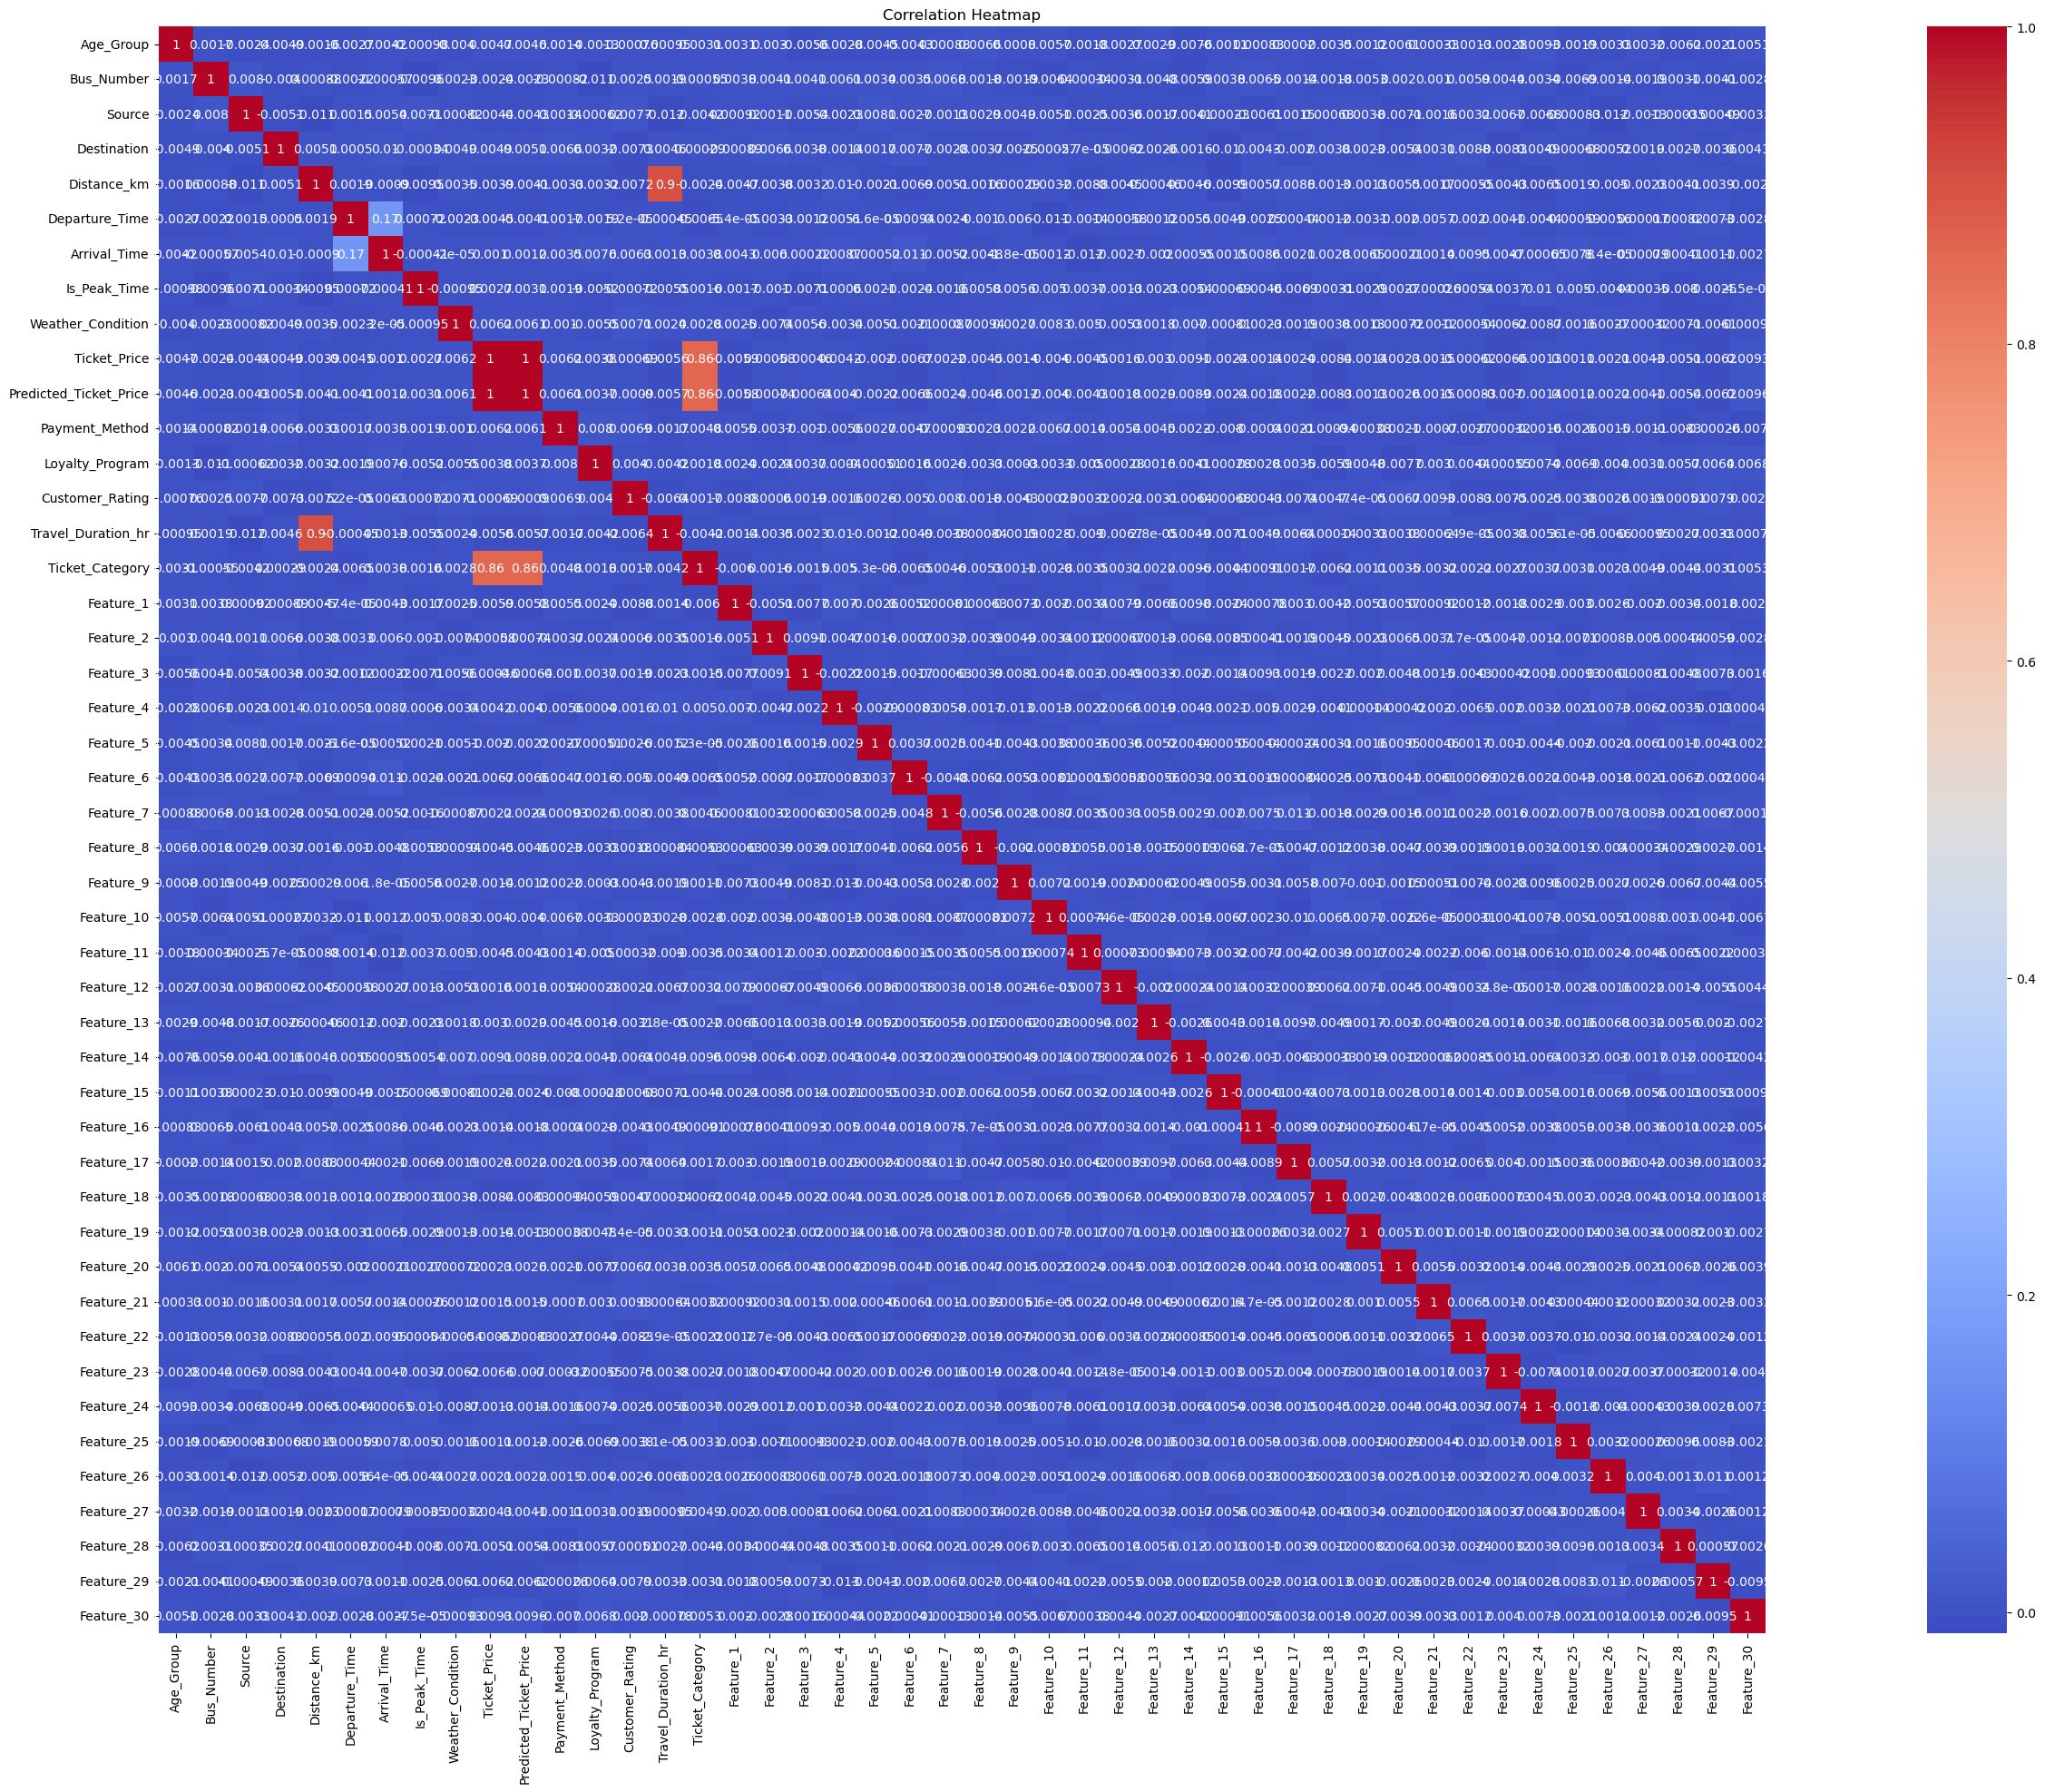

In [ ]:
plt.figure(figsize=(46,23))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - After Preprocessing')
plt.tight_layout()
plt.savefig('heatmap_final_correlation.png', dpi=100, bbox_inches='tight')
plt.show()

## Classifiation  Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop(['Is_Peak_Time'], axis=1)  
Y = df['Is_Peak_Time']  

### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled [:1]


array([[ 0.47211226, -0.31513872, -1.3410984 ,  0.44690854, -0.68045536,
        -0.86363243, -0.28842291,  0.90048549, -0.0048064 , -0.05317159,
         0.60461855, -0.64845295, -0.69055236, -0.54969212, -0.89457722,
        -0.39552663, -1.18795792,  0.84879586,  1.46051988,  1.12698659,
        -0.71306248,  1.09670819, -1.60633125, -0.01059306, -1.02069453,
         1.50863657, -1.03164657,  1.05304074,  0.50213147, -0.91820045,
         0.77810695,  0.19241911, -0.19567518,  1.29535414, -1.30038722,
         1.42444392,  1.44026892, -0.11322378, -1.7191857 , -1.65269509,
         1.02195355,  0.70792111,  1.4957885 , -0.11891524, -0.98324021]])

# Train-Test Split


In [71]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X_scaled, Y, test_size=0.2, random_state=27)

In [72]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  44000
Size of Train Y =  44000
Size of Test X =  11000
Size of Test Y =  11000


In [73]:
X = X
Y = df['Predicted_Ticket_Price']

# Apply PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=30)

In [77]:
X_pca = pca.fit_transform(X_scaled)

In [78]:
X_pca.shape

(55000, 30)

In [79]:
X = X_pca

# Appling all models of Classification for better out-come one-by-one

 # 1) Logistic Regression

In [82]:
Gujjar  = LogisticRegression(solver='liblinear', random_state=27)
Gujjar.fit(X_TRAIN, Y_TRAIN)
LogisticRegression(random_state=27, solver='liblinear')

LogisticRegression(random_state=27, solver='liblinear')

## Prediction on Train Set 


In [84]:
X_train_prediction = Gujjar.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 0.69775


### Confusion Matrics

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
conf_mat = confusion_matrix(Y_TRAIN, X_train_prediction)

In [88]:
print("Confusion Matrix:")

print(conf_mat)

Confusion Matrix:
[[30701     0]
 [13299     0]]


In [89]:
from sklearn.metrics import ConfusionMatrixDisplay


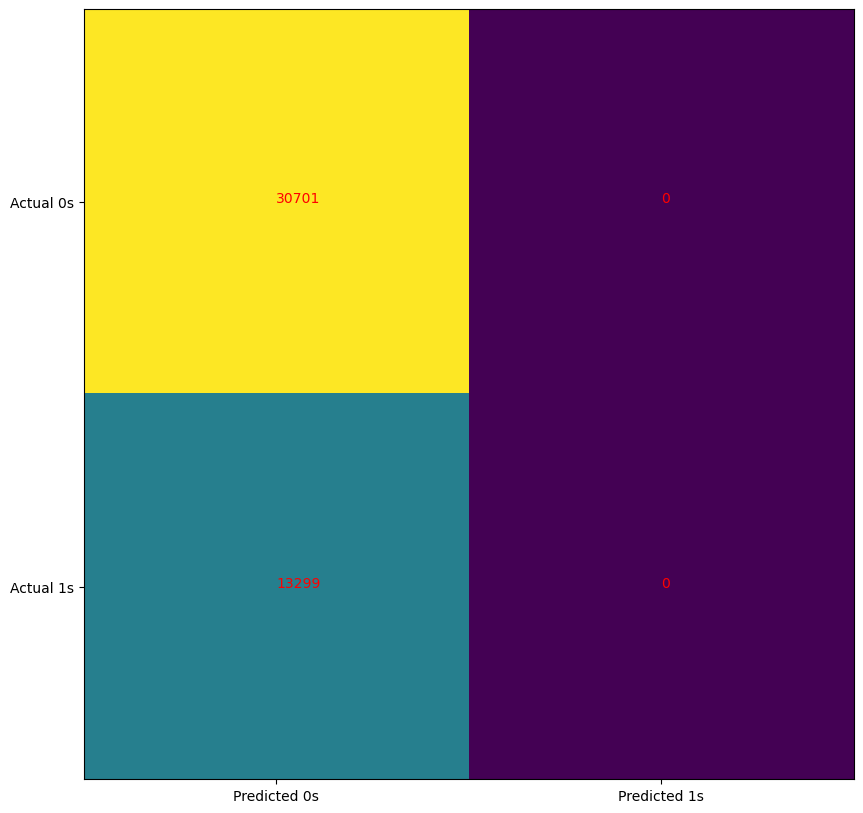

In [90]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TRAIN, X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Prediction on Test Set

In [95]:
X_test_prediction = Gujjar.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.6976363636363636


##  Confussion Matrix

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_TEST,X_test_prediction)

array([[7674,    0],
       [3326,    0]], dtype=int64)

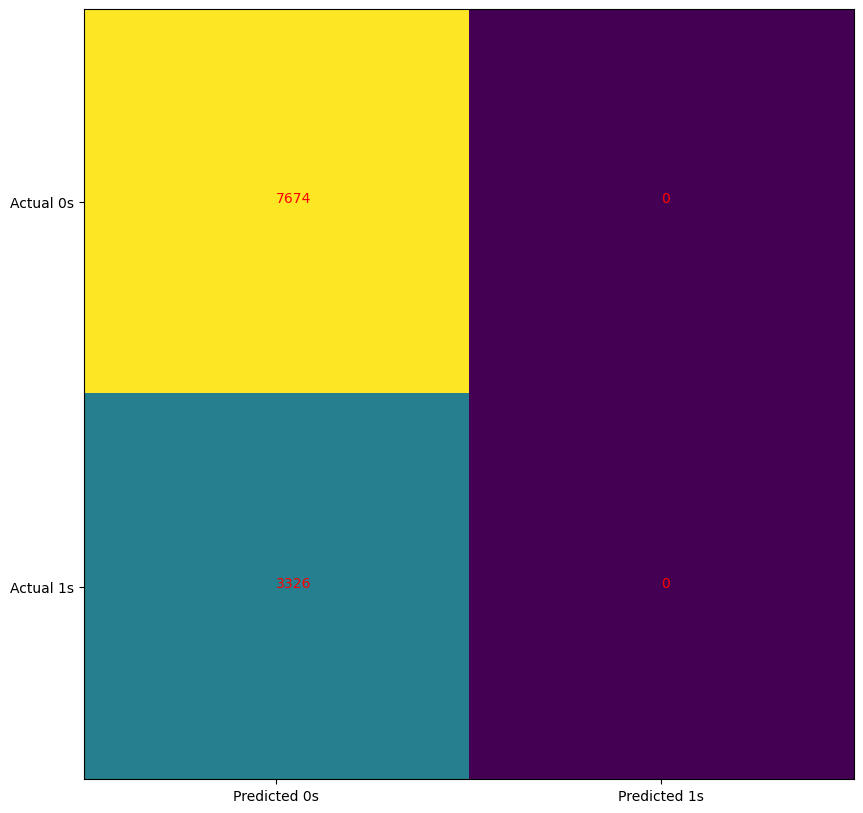

In [98]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classificaiton Report 

In [100]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      7674
           1       0.00      0.00      0.00      3326

    accuracy                           0.70     11000
   macro avg       0.35      0.50      0.41     11000
weighted avg       0.49      0.70      0.57     11000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2) - Naïve Base/Gaussian Naïve Base

In [102]:
from sklearn.naive_bayes import GaussianNB
Gujjar = GaussianNB()
Gujjar.fit(X_TRAIN, Y_TRAIN)
GaussianNB()

GaussianNB()

## Perform Predictions on Train DATa set

In [104]:
X_train_prediction = Gujjar.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 0.69775


### Confusion Matrix

In [107]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[30701,     0],
       [13299,     0]], dtype=int64)

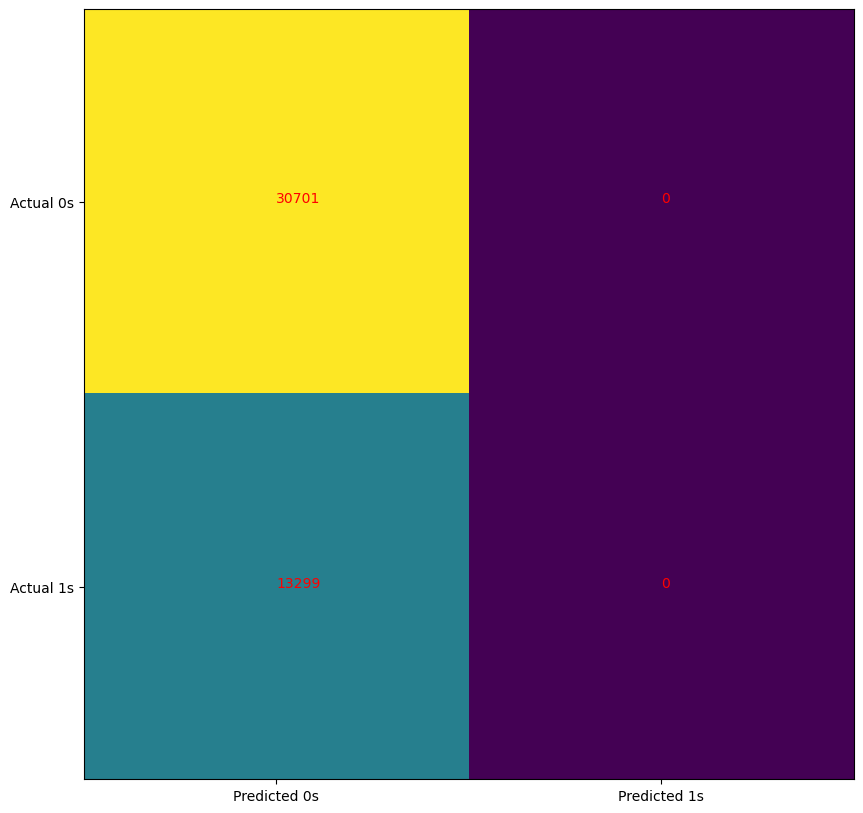

In [108]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TRAIN, X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Perform Testing on Testing set

In [111]:
X_test_prediction = Gujjar.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.6976363636363636


## Canfsion Matrix

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_TEST,X_test_prediction)

array([[7674,    0],
       [3326,    0]], dtype=int64)

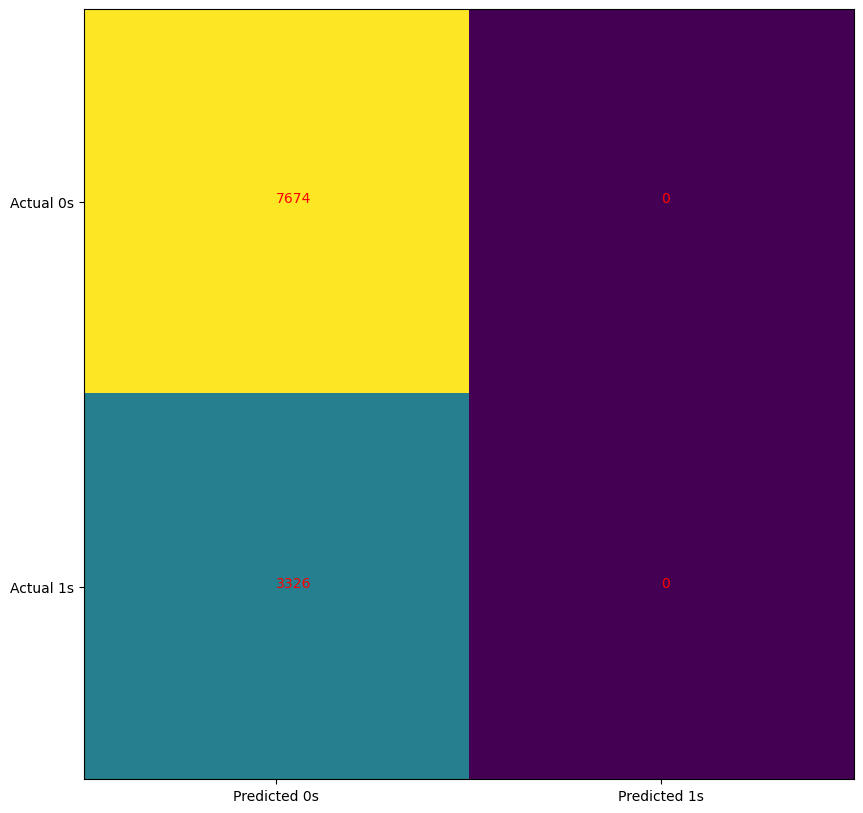

In [114]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classification Report

In [116]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      7674
           1       0.00      0.00      0.00      3326

    accuracy                           0.70     11000
   macro avg       0.35      0.50      0.41     11000
weighted avg       0.49      0.70      0.57     11000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 3) Decision Tree

In [118]:
Gujjar= DecisionTreeClassifier(random_state=27)
Gujjar.fit(X_TRAIN, Y_TRAIN) 
DecisionTreeClassifier(random_state=27)

DecisionTreeClassifier(random_state=27)

# Perform Training on train set

In [120]:
X_train_prediction = Gujjar.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 1.0


## Draw Canfusion Matreix 

In [122]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[30701,     0],
       [    0, 13299]], dtype=int64)

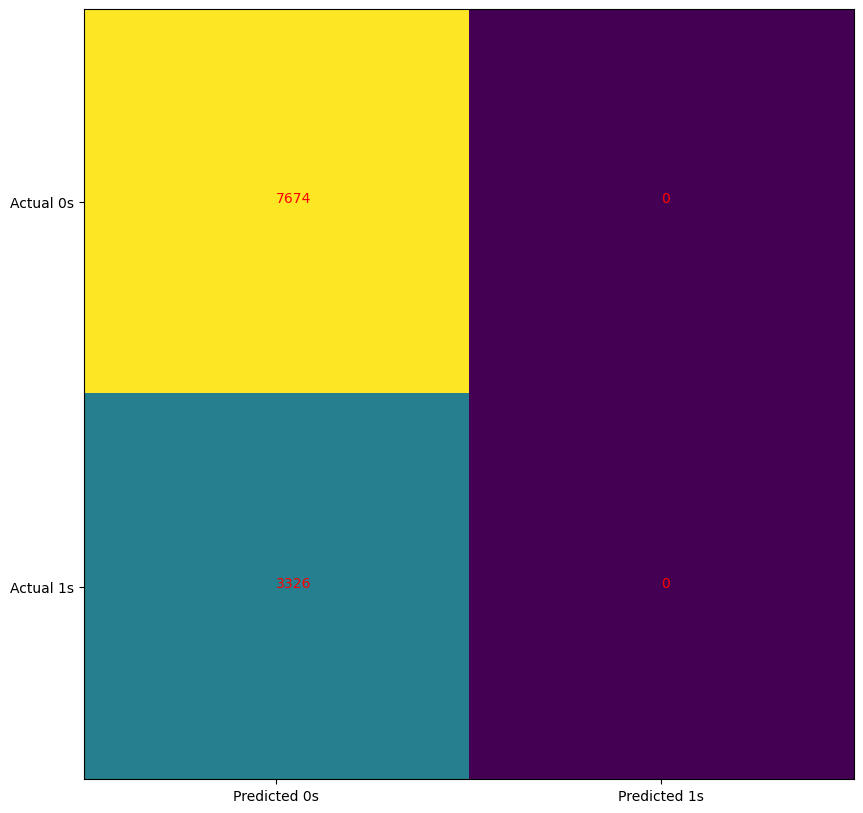

In [123]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Prediction on Test Set

In [127]:
X_test_prediction = Gujjar.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.5705454545454546


## Canfusion Matrix 

In [129]:
confusion_matrix(Y_TEST,X_test_prediction)

array([[5216, 2458],
       [2266, 1060]], dtype=int64)

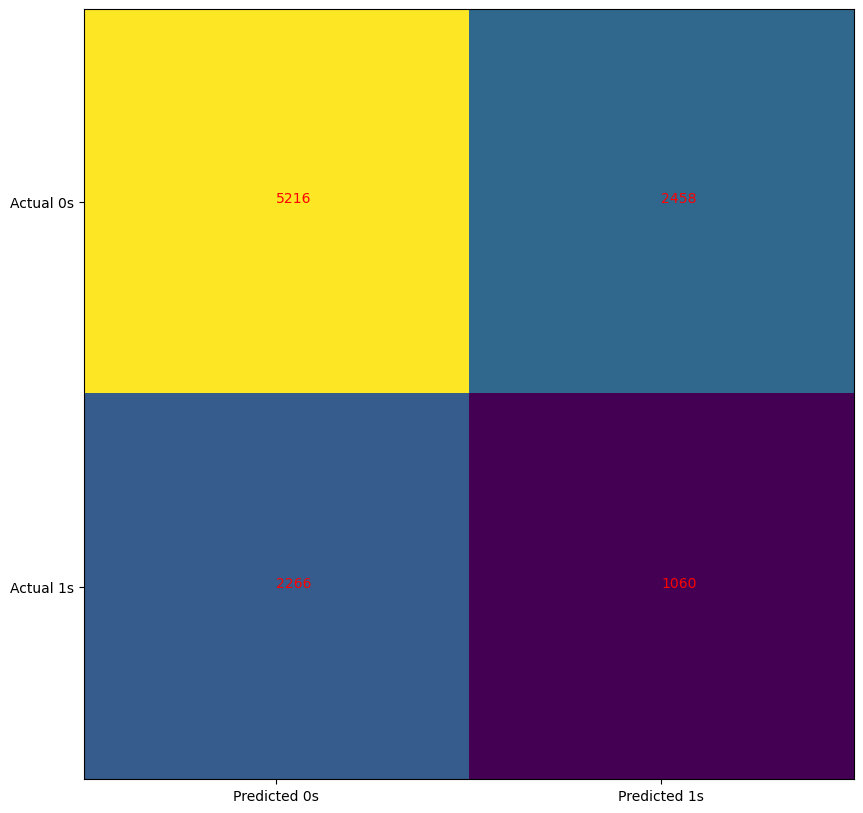

In [130]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST,X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classificaion Report

In [132]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      7674
           1       0.30      0.32      0.31      3326

    accuracy                           0.57     11000
   macro avg       0.50      0.50      0.50     11000
weighted avg       0.58      0.57      0.57     11000



# 4) Random Forest

In [134]:
Gujjar = RandomForestClassifier(n_estimators=27, random_state=27)
Gujjar.fit(X_TRAIN, Y_TRAIN) 
RandomForestClassifier(n_estimators=27, random_state=27)

RandomForestClassifier(n_estimators=27, random_state=27)

## Perform Training on Trian Data

In [136]:
X_train_prediction = Gujjar.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 0.9991590909090909


## Canfusion Metrix

In [138]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[30701,     0],
       [   37, 13262]], dtype=int64)

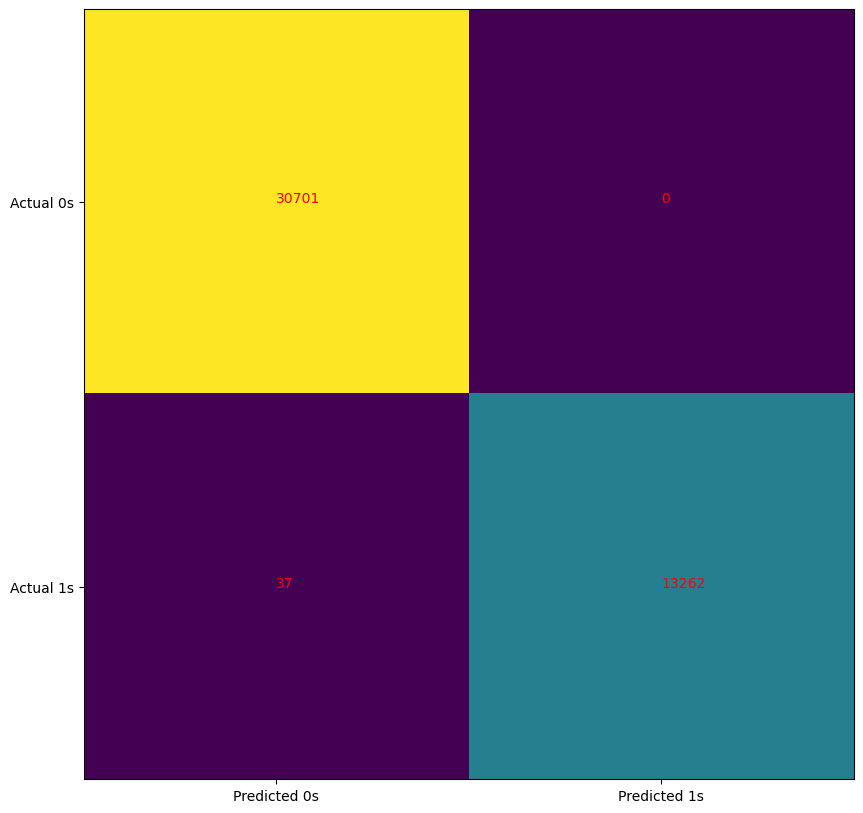

In [140]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN,X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Prediction on TEST Set

In [142]:
X_test_prediction = Gujjar.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.6840909090909091


### Confusion Matric

In [144]:
confusion_matrix(Y_TEST,X_test_prediction)

array([[7418,  256],
       [3219,  107]], dtype=int64)

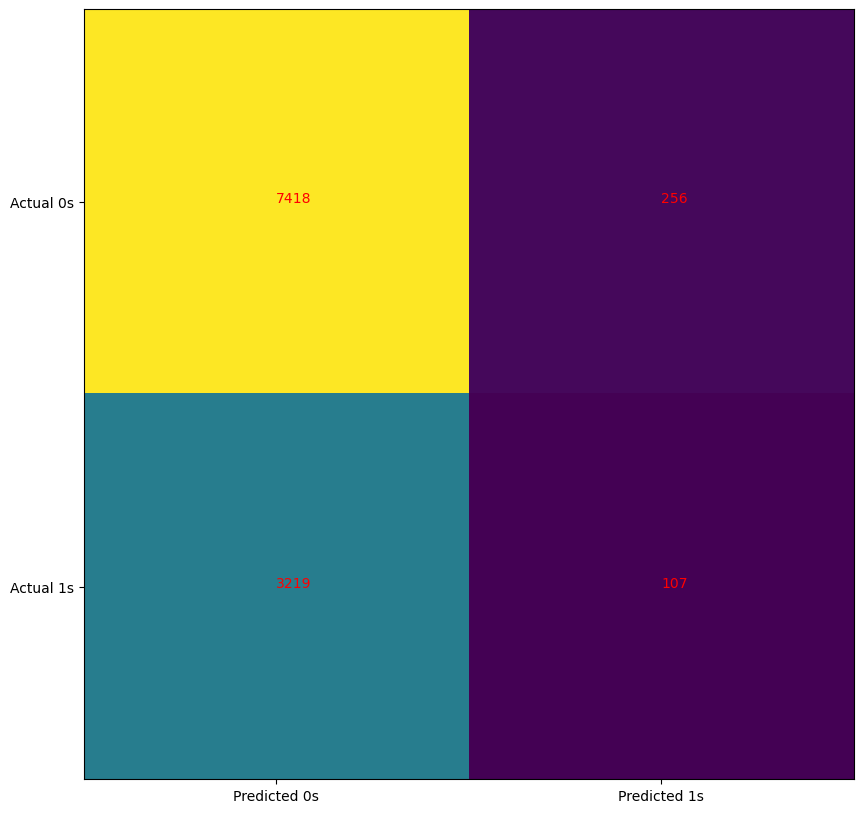

In [146]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classification Report

In [148]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      7674
           1       0.29      0.03      0.06      3326

    accuracy                           0.68     11000
   macro avg       0.50      0.50      0.43     11000
weighted avg       0.58      0.68      0.58     11000



# 5) SVM

In [120]:
Gujjar = SVC(kernel='linear')
Gujjar.fit(X_TRAIN , Y_TRAIN)

SVC(kernel='linear')

## Predictions on Traing data

In [122]:
X_train_prediction = Gujjar.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction, Y_TRAIN)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6987045454545454


## Canfusion Matrix

In [124]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[30743,     0],
       [13257,     0]], dtype=int64)

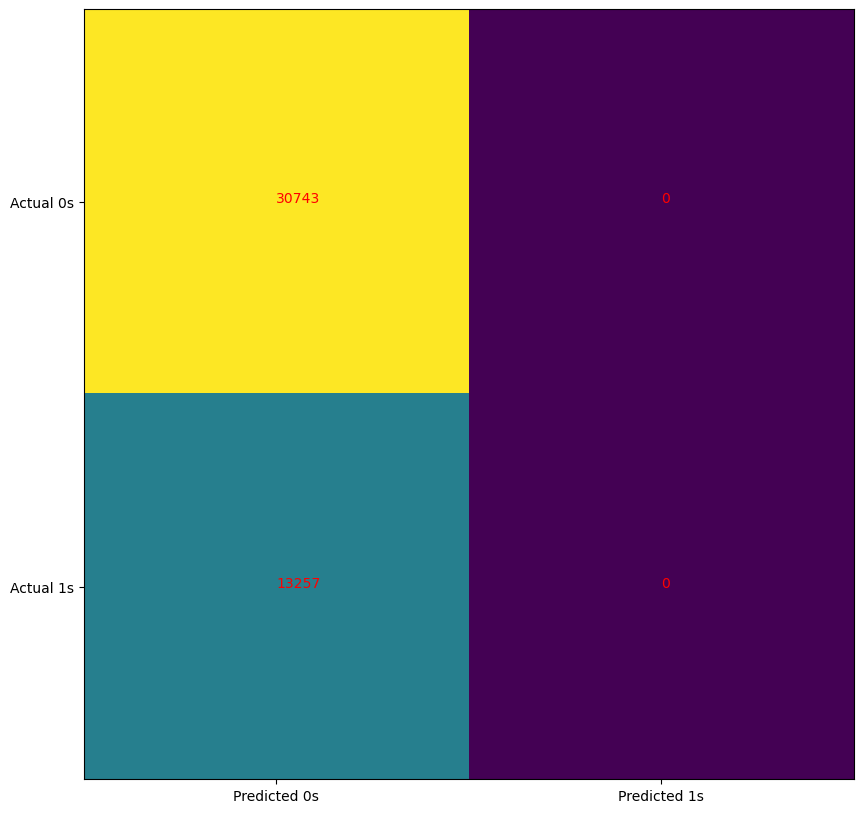

In [125]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN,X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Perform Testing on TEST Set

In [127]:
X_test_prediction = Gujjar.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.6938181818181818


## Canfusion Matrix

In [129]:
confusion_matrix(Y_TEST,X_test_prediction)

array([[7632,    0],
       [3368,    0]], dtype=int64)

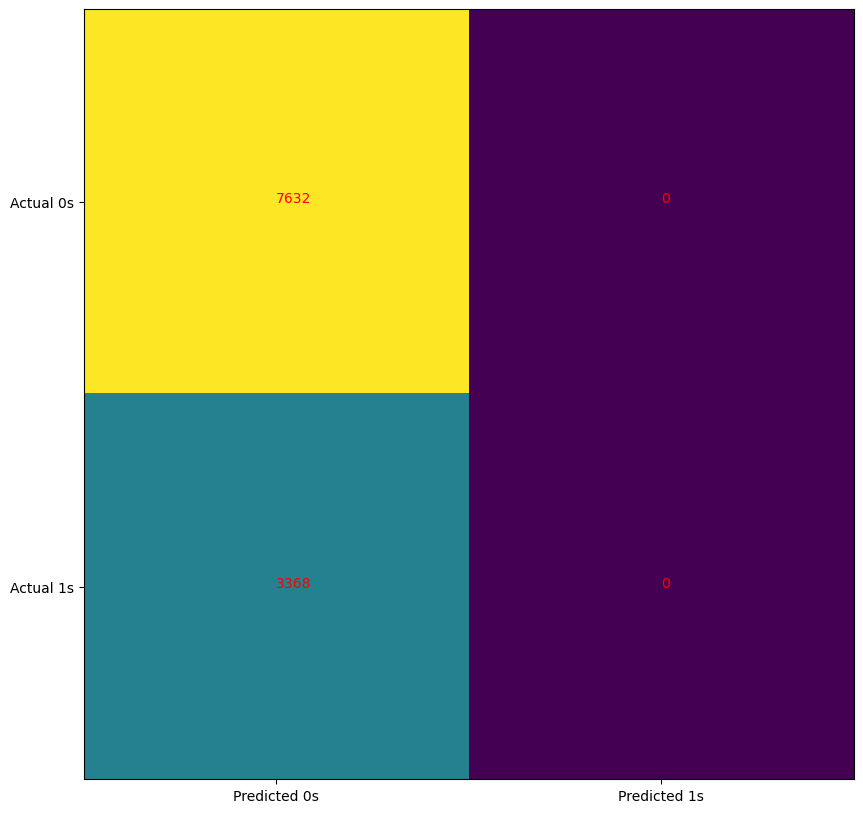

In [130]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

In [131]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      7632
           1       0.00      0.00      0.00      3368

    accuracy                           0.69     11000
   macro avg       0.35      0.50      0.41     11000
weighted avg       0.48      0.69      0.57     11000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusion: Which model is performed best for your classification problem

## Answer : Logistic Regression , Naive Based and SVM giving same testing ACCuracy 6938181818181818 %

In [ ]:
pip install --upgrade pip

In [ ]:
pip install tensorflow-rocm


In [ ]:
# model.summary()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Define ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))  # Input layer + Hidden Layer 1
model.add(Dense(32, activation='relu'))  # Hidden Layer 2
model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Save and display the model diagram
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load and display the saved image
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()
